### Day 5 - Autoregressive Forecast Model

In [1]:
from pandas import read_csv
from matplotlib import pyplot

series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


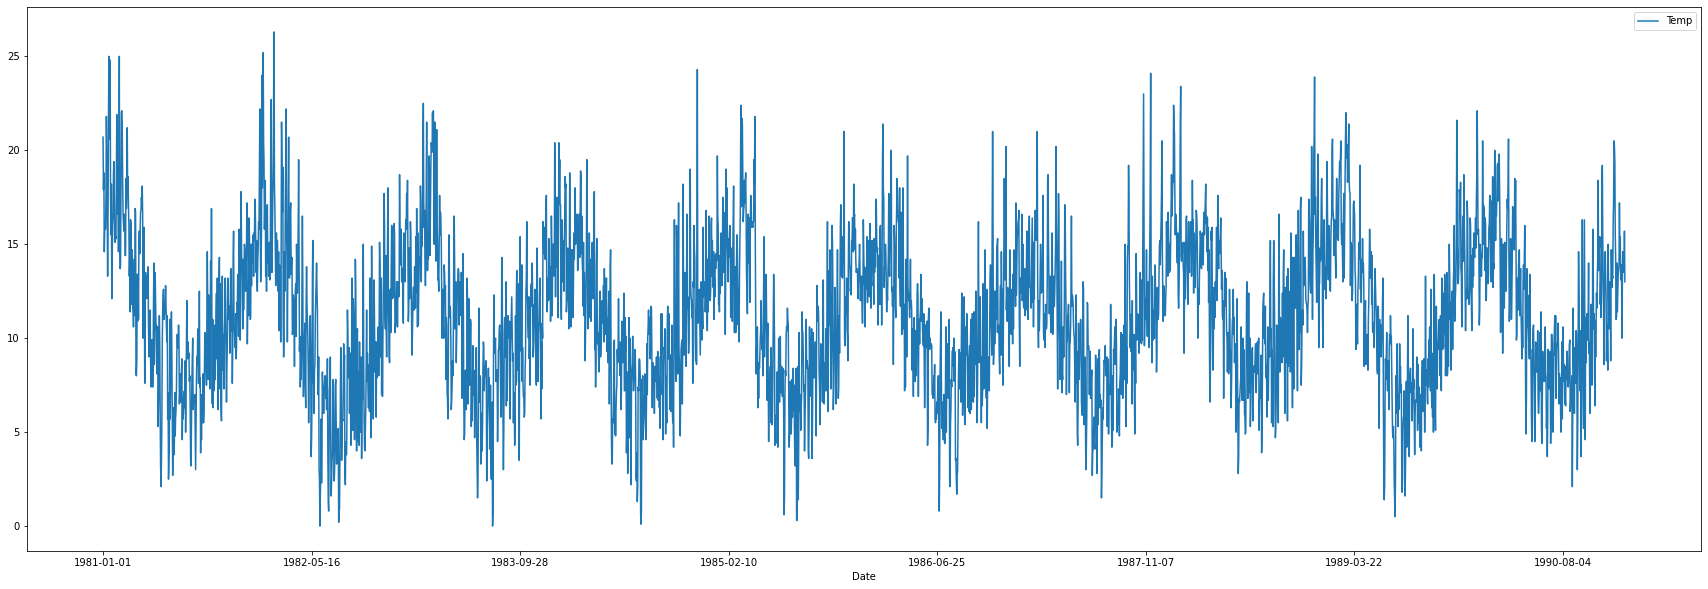

In [6]:
series.plot(figsize=(30, 10))
pyplot.show()

### 1. Quick Check for Autocorrelation and Plot

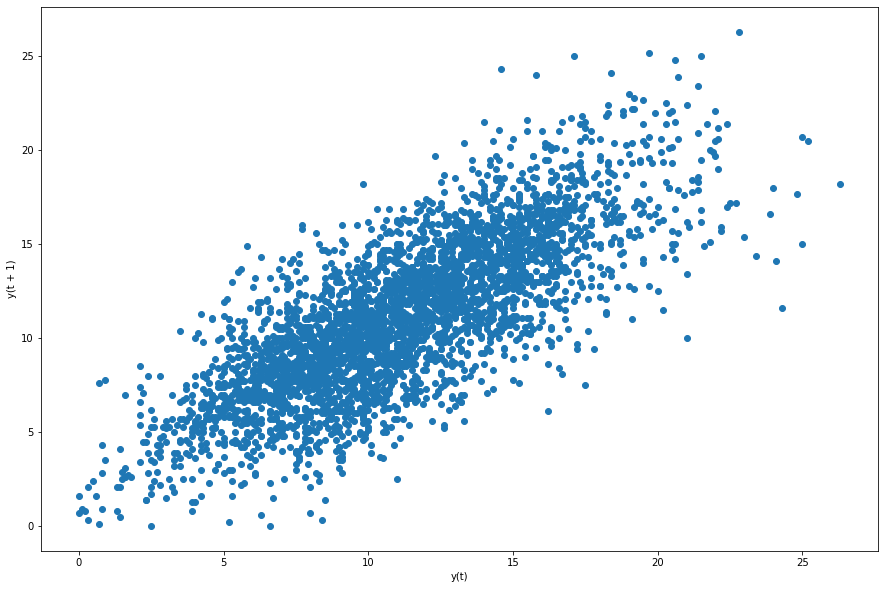

In [9]:
from pandas.plotting import lag_plot
pyplot.figure(figsize=(15,10))
lag_plot(series)
pyplot.show()

In [11]:
from pandas import DataFrame
from pandas import concat

values = DataFrame(series.values)
df = concat([values.shift(1), values], axis=1)
df.columns = ['t-1', 't+1']
result = df.corr()
result

,t-1,t+1
t-1,1.00000,0.77487
t+1,0.77487,1.00000


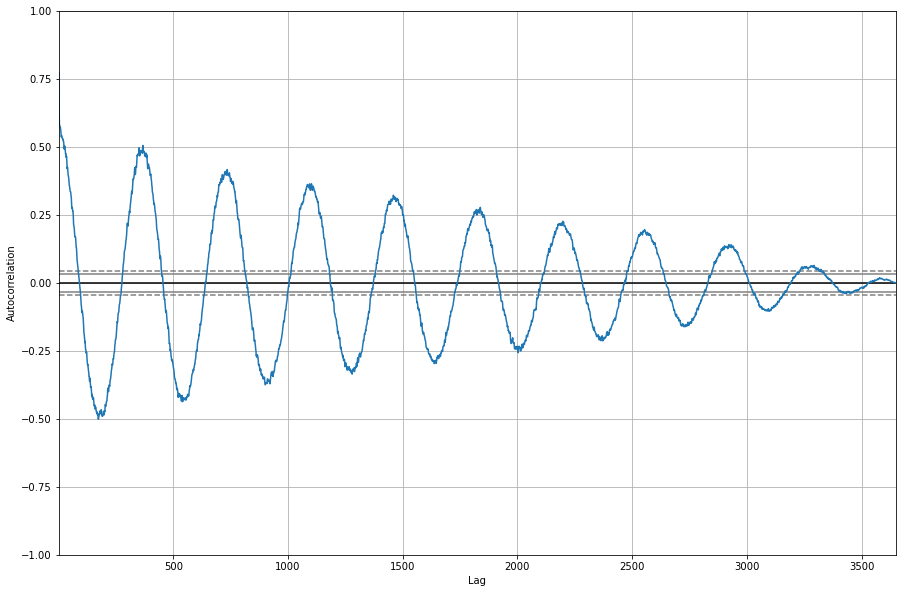

In [12]:
from pandas.plotting import autocorrelation_plot

pyplot.figure(figsize=(15,10))
autocorrelation_plot(series)
pyplot.show()

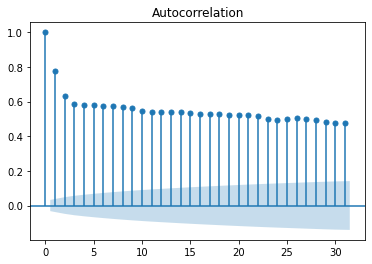

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series, lags=31)
pyplot.show()

### 2. Persistence Model

In [19]:
from sklearn.metrics import mean_squared_error

# split into train and test sets
X = df.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [20]:
# persistence model
def model_persistence(x):
    return x

Test MSE - 3.423


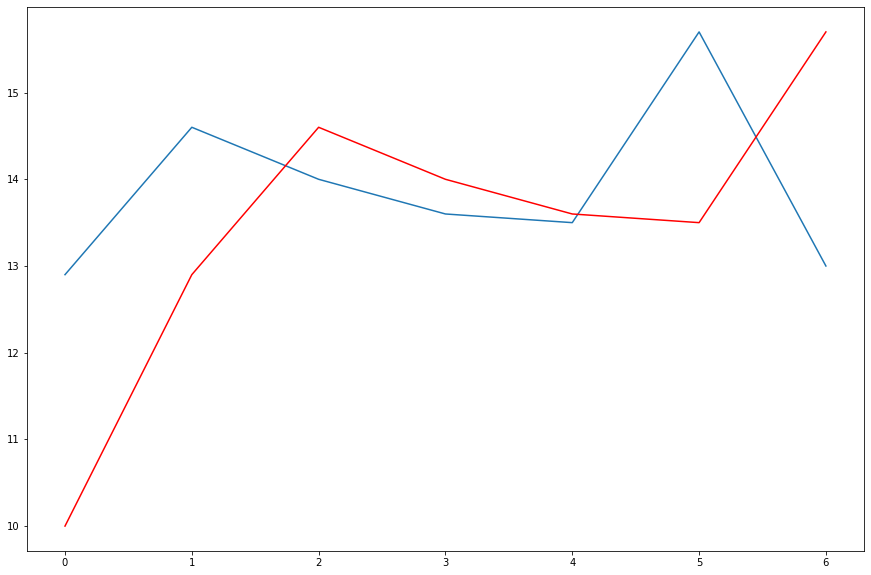

In [38]:
# walk-forward validation
predictions = list()
for x in test_X:
    prediction = model_persistence(x)
    predictions.append(prediction)

test_score = mean_squared_error(test_y, predictions)
print('Test MSE - {:0.3f}'.format(test_score))
# plot predictions vs expected
pyplot.figure(figsize=(15, 10))
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

### 3. Autoregression Model

In [42]:
from statsmodels.tsa.ar_model import AutoReg

X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=30)
model_fit = model.fit()
print('Coefficients - {}'.format(model_fit.params))

Coefficients - [ 5.56429955e-01  5.88555340e-01 -9.08389232e-02  4.82525824e-02
  4.01288308e-02  3.93509765e-02  2.59094346e-02  4.46634788e-02
  1.27688308e-02  3.72271892e-02 -6.35909322e-04  4.68955775e-03
  1.83987037e-02  2.71527420e-02  5.38687107e-04  2.47899856e-02
  7.60649959e-03  9.95186007e-03  3.41614572e-02 -9.24670710e-03
  2.41985731e-02  1.88262568e-02  1.23166395e-02 -1.86042650e-02
 -1.78407089e-03  1.67121327e-02  1.97846130e-02  9.73045836e-03
  6.31625219e-03 -1.28563784e-03 -1.79066328e-04]


C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [45]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
for x in range(len(predictions)):
    print('predict - {:0.2f}, expect - {}'.format(predictions[x], float(test[x])))

predict - 11.87, expect - 12.9
predict - 13.05, expect - 14.6
predict - 13.53, expect - 14.0
predict - 13.24, expect - 13.6
predict - 13.09, expect - 13.5
predict - 13.15, expect - 15.7
predict - 13.18, expect - 13.0


In [46]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - {:0.3f}'.format(rmse))

Test RMSE - 1.225


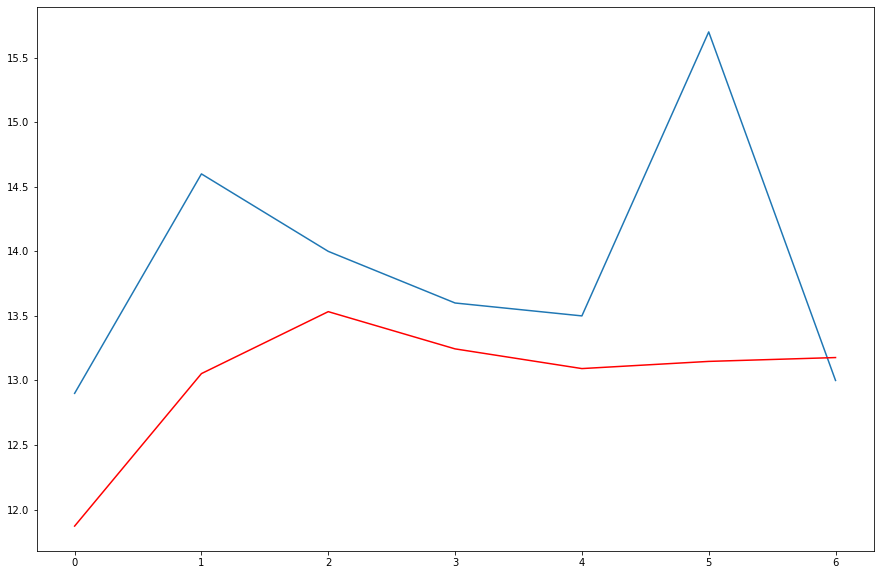

In [47]:
# plot 
pyplot.figure(figsize=(15, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [55]:
# an updated autoregressive model
window = 29

model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params

history = train[len(train) - window:]
history = [history[x] for x in range(len(history))]

C:\Users\Tong\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [62]:
predictions = list()
for x in range(len(test)):
    length = len(history)
    lag = [history[y] for y in range(length - window, length)]
    prediction = coef[0]
    for d in range(window):
        prediction += coef[d+1] * lag[window -d - 1]
    observation = test[x]
    predictions.append(prediction)
    history.append(observation)
    print('predict - {:0.3f}, expect - {}'.format(float(prediction), float(observation)))

predict - 12.928, expect - 12.9
predict - 13.237, expect - 14.6
predict - 14.034, expect - 14.0
predict - 13.720, expect - 13.6
predict - 13.361, expect - 13.5
predict - 13.502, expect - 15.7
predict - 14.643, expect - 13.0


In [63]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE - {:0.3f}'.format(rmse))

Test RMSE - 1.160


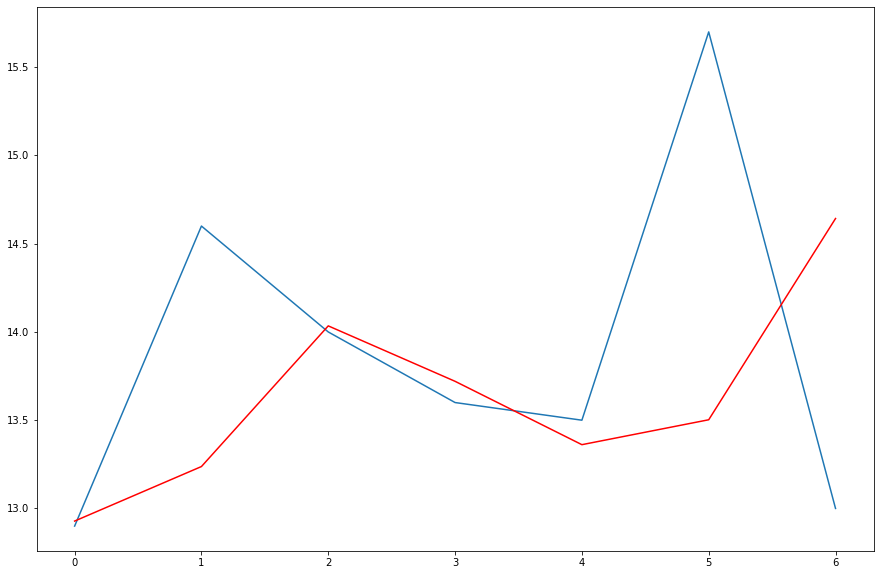

In [65]:
# plot
pyplot.figure(figsize=(15, 10))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()